### Charles Mayfield

"On my honor, as a student, I have neither given nor received unauthorized aid on this academic work."

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#import decisiontreeclassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
#import logisticregression classifier
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
#import knn classifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn import svm
from sklearn.neural_network import MLPClassifier


#ensemble classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier  #GBM algorithm

from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV 
from sklearn import metrics
from sklearn.metrics import roc_auc_score, auc

# feature selection
from sklearn.feature_selection import RFE
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [56]:
#Importing the data
df=pd.read_excel("train_test_dataset.xlsx")
df.head()

,FAKEID,Y2defect,Y1G5,Y1G4,Y1G3,Y1G2,Y1G1,Y1price,YEARS,BACKER,AGE,INCOME,CHILD,GNDR,OWNHOME,SPORT,COMP,PCTMARR,HOMEVAL
0,580V74KT,0,0,0,1,1,1,15,8,1,94,4,NaN,0,1,NaN,,77,203
1,298S54OK,1,0,0,1,0,1,15,3,1,,,NaN,0,0,NaN,1,53,68
2,268D25AO,1,1,0,0,0,1,15,11,1,67,2,NaN,0,1,0.0,,50,38
3,312Q12WV,1,1,0,1,0,1,15,4,0,62,4,,1,1,0.0,1,60,68
4,420R23VB,0,0,0,1,0,0,15,5,0,89,4,,1,1,0.0,,65,194


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9216 entries, 0 to 9215
Data columns (total 19 columns):
FAKEID      9216 non-null object
Y2defect    9216 non-null int64
Y1G5        9216 non-null int64
Y1G4        9216 non-null int64
Y1G3        9216 non-null int64
Y1G2        9216 non-null int64
Y1G1        9216 non-null int64
Y1price     9216 non-null int64
YEARS       9216 non-null int64
BACKER      9216 non-null int64
AGE         9216 non-null object
INCOME      9216 non-null object
CHILD       4549 non-null object
GNDR        9216 non-null object
OWNHOME     9216 non-null object
SPORT       4273 non-null float64
COMP        9216 non-null object
PCTMARR     9216 non-null int64
HOMEVAL     9216 non-null int64
dtypes: float64(1), int64(11), object(7)
memory usage: 1.3+ MB


In [58]:
df.isnull().sum()

FAKEID         0
Y2defect       0
Y1G5           0
Y1G4           0
Y1G3           0
Y1G2           0
Y1G1           0
Y1price        0
YEARS          0
BACKER         0
AGE            0
INCOME         0
CHILD       4667
GNDR           0
OWNHOME        0
SPORT       4943
COMP           0
PCTMARR        0
HOMEVAL        0
dtype: int64

In [59]:
df = df.drop(['CHILD','COMP','SPORT'], axis=1)
df.head()

,FAKEID,Y2defect,Y1G5,Y1G4,Y1G3,Y1G2,Y1G1,Y1price,YEARS,BACKER,AGE,INCOME,GNDR,OWNHOME,PCTMARR,HOMEVAL
0,580V74KT,0,0,0,1,1,1,15,8,1,94,4,0,1,77,203
1,298S54OK,1,0,0,1,0,1,15,3,1,,,0,0,53,68
2,268D25AO,1,1,0,0,0,1,15,11,1,67,2,0,1,50,38
3,312Q12WV,1,1,0,1,0,1,15,4,0,62,4,1,1,60,68
4,420R23VB,0,0,0,1,0,0,15,5,0,89,4,1,1,65,194


In [60]:
#Check for null values again
df.isnull().sum()

FAKEID      0
Y2defect    0
Y1G5        0
Y1G4        0
Y1G3        0
Y1G2        0
Y1G1        0
Y1price     0
YEARS       0
BACKER      0
AGE         0
INCOME      0
GNDR        0
OWNHOME     0
PCTMARR     0
HOMEVAL     0
dtype: int64

In [61]:
df.describe()

,Y2defect,Y1G5,Y1G4,Y1G3,Y1G2,Y1G1,Y1price,YEARS,BACKER,PCTMARR,HOMEVAL
count,9216.000000,9216.000000,9216.000000,9216.000000,9216.000000,9216.000000,9216.000000,9216.000000,9216.000000,9216.000000,9216.000000
mean,0.500000,0.337023,0.510525,0.636719,0.291124,0.480252,19.963108,6.378038,0.489475,58.228516,112.111220
std,0.500027,0.472718,0.499916,0.480971,0.454305,0.499637,8.820188,2.873927,0.499916,12.902173,92.292223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000,2.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000,4.000000,0.000000,52.000000,56.000000
50%,0.500000,0.000000,1.000000,1.000000,0.000000,0.000000,15.000000,6.000000,0.000000,61.000000,81.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,25.000000,9.000000,1.000000,67.000000,132.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,50.000000,24.000000,1.000000,99.000000,600.000000


In [62]:
df['Y1Games'] = df['Y1G5'] + df['Y1G4'] + df['Y1G3'] + df['Y1G2'] + df['Y1G1']

In [63]:
df = df.drop(["Y1G5","Y1G4","Y1G3","Y1G2","Y1G1"], axis=1)

In [64]:
df.head()

,FAKEID,Y2defect,Y1price,YEARS,BACKER,AGE,INCOME,GNDR,OWNHOME,PCTMARR,HOMEVAL,Y1Games
0,580V74KT,0,15,8,1,94,4,0,1,77,203,3
1,298S54OK,1,15,3,1,,,0,0,53,68,2
2,268D25AO,1,15,11,1,67,2,0,1,50,38,2
3,312Q12WV,1,15,4,0,62,4,1,1,60,68,3
4,420R23VB,0,15,5,0,89,4,1,1,65,194,1


# Model Testing

In [65]:
y = df['Y2defect']
#X = df[['Y1price',]]
#X = df[['Y1Games']]
#X = df[['Y1Games', 'BACKER']]
#X = df[['Y1price', 'BACKER']]
#X = df[['Y1Games', 'Y1price', 'HOMEVAL']]
X = df[['BACKER', 'Y1price', 'Y1Games']]



In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [67]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [68]:
print metrics.accuracy_score(y_test, dt.predict(X_test))
print metrics.confusion_matrix(y_test, dt.predict(X_test))
print metrics.classification_report(y_test, dt.predict(X_test))
print metrics.roc_auc_score(y_test, dt.predict(X_test))

0.600361663653
[[1030  333]
 [ 772  630]]
             precision    recall  f1-score   support

          0       0.57      0.76      0.65      1363
          1       0.65      0.45      0.53      1402

avg / total       0.61      0.60      0.59      2765

0.602522023354


In [69]:
df2 = pd.read_excel("validation_dataset.xlsx")
df2.head()

,FAKEID,Y3defect,Y2G5,Y2G4,Y2G3,Y2G2,Y2G1,Y2price,YEARS,BACKER,AGE,INCOME,CHILD,GNDR,OWNHOME,SPORT,COMP,PCTMARR,HOMEVAL
0,580D24RR,NaN,0,0,1,1,0,15,5,0,49.0,4,NaN,0,1,0.0,,66,64
1,179Q96NO,NaN,1,1,1,1,1,25,9,1,84.0,5,,0,,0.0,,67,128
2,050Z45TB,NaN,1,0,1,1,0,15,5,1,NaN,,NaN,0,0,NaN,1,52,113
3,399V18KY,NaN,0,0,1,1,0,15,1,0,34.0,4,1,0,1,NaN,,65,81
4,009A52KP,NaN,0,1,0,1,0,25,9,1,59.0,4,NaN,1,1,0.0,,65,110


In [70]:
df2['Y2Games'] = df2['Y2G5'] + df2['Y2G4'] + df2['Y2G3'] + df2['Y2G2'] + df2['Y2G1']

In [71]:
df2 = df2.drop(["Y2G5","Y2G4","Y2G3","Y2G2","Y2G1"], axis=1)

In [73]:
validation = df2[['BACKER', 'Y2price', 'Y2Games']]
validation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9542 entries, 0 to 9541
Data columns (total 3 columns):
BACKER     9542 non-null int64
Y2price    9542 non-null int64
Y2Games    9542 non-null int64
dtypes: int64(3)
memory usage: 223.7 KB


In [74]:
fakeid = pd.DataFrame(df2['FAKEID'])
fakeid.head()

,FAKEID
0,580D24RR
1,179Q96NO
2,050Z45TB
3,399V18KY
4,009A52KP


In [96]:
df.corr()

,Y2defect,Y1price,YEARS,BACKER,PCTMARR,HOMEVAL,Y1Games
Y2defect,1.000000,-0.023498,-0.139099,-0.189929,-0.023869,0.029722,-0.164720
Y1price,-0.023498,1.000000,0.043768,-0.090287,0.008032,0.095580,0.022259
YEARS,-0.139099,0.043768,1.000000,0.533836,0.023691,-0.049689,0.217106
BACKER,-0.189929,-0.090287,0.533836,1.000000,0.032558,-0.064727,0.220321
PCTMARR,-0.023869,0.008032,0.023691,0.032558,1.000000,0.046570,0.021239
HOMEVAL,0.029722,0.095580,-0.049689,-0.064727,0.046570,1.000000,-0.011751
Y1Games,-0.164720,0.022259,0.217106,0.220321,0.021239,-0.011751,1.000000


In [75]:
# applying the decision tree model to validation dataset
output_scoring = dt.predict(validation)

# generating probability for defect for each fan
probs = dt.predict_proba(validation)
probs = pd.DataFrame(probs, columns=['prob of Renewal', 'prob of Defect'])

# joining two dataframes (fakeid and probability)
risky_fans = fakeid.join(probs)

# joining dataframes (fakeid, probability, and prediction)
predicted_y= pd.DataFrame(output_scoring, columns=['Predicted Defect'])
risky_fans = risky_fans.join(predicted_y)

# generating submission file
risky_fans.to_csv("submissionentry.csv", index=False)

# Data Visualization

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000001329AB00>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000000011059198>]], dtype=object)

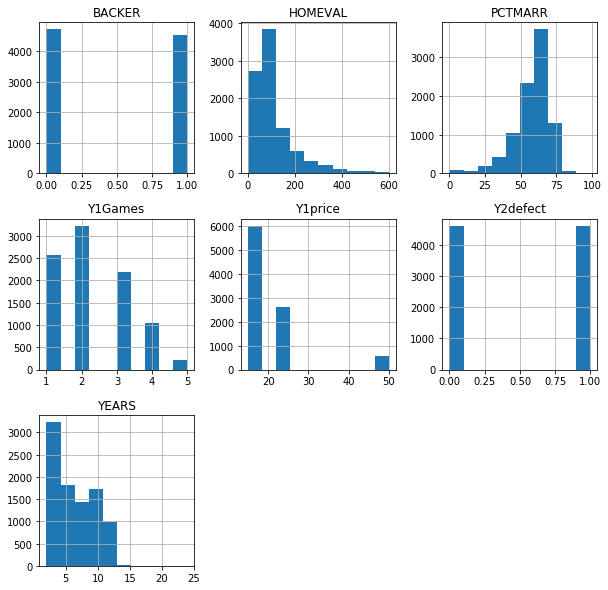

In [76]:
df.hist(figsize=(10,10))

In [81]:
grouped = df.groupby(['Y1Games', 'Y1price'])
df.head()

,FAKEID,Y2defect,Y1price,YEARS,BACKER,AGE,INCOME,GNDR,OWNHOME,PCTMARR,HOMEVAL,Y1Games
0,580V74KT,0,15,8,1,94,4,0,1,77,203,3
1,298S54OK,1,15,3,1,,,0,0,53,68,2
2,268D25AO,1,15,11,1,67,2,0,1,50,38,2
3,312Q12WV,1,15,4,0,62,4,1,1,60,68,3
4,420R23VB,0,15,5,0,89,4,1,1,65,194,1


# Data Analysis

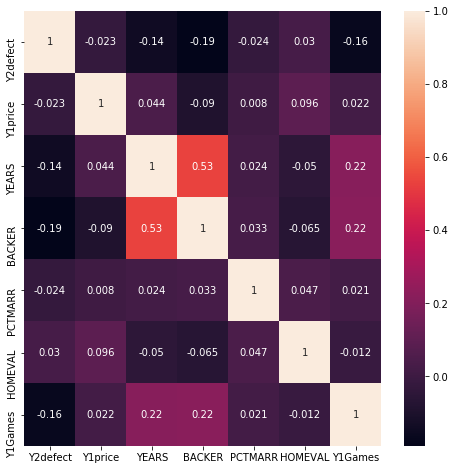

In [77]:
#Creating a plot to check corelation
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(), annot=True)

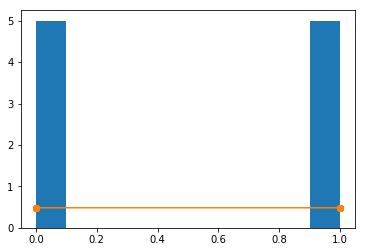

In [83]:
from scipy import stats

defectNormality = sorted(df['Y2defect'])
fit_defect = stats.norm.pdf(defectNormality, np.mean(defectNormality), np.std(defectNormality))
plt.hist(defectNormality,normed=True)
plt.plot(defectNormality,fit_defect,'-o')


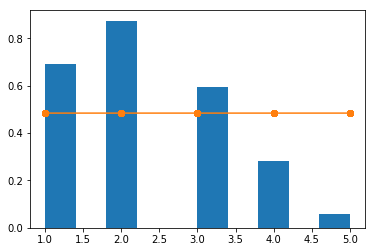

In [85]:
gamesNormality = sorted(df['Y1Games'])
fit_games = stats.norm.pdf(gamesNormality, np.mean(gamesNormality), np.std(gamesNormality))
plt.hist(gamesNormality,normed=True)
plt.plot(gamesNormality,fit_defect,'-o')


In [90]:
gamesThreeDecimal = stats.normaltest(df['Y1Games'])

print "The chi-square statistic is %.3f and the p-value is %.3f." % gamesThreeDecimal

The chi-square statistic is 526.911 and the p-value is 0.000.


In [87]:
df.corr()

,Y2defect,Y1price,YEARS,BACKER,PCTMARR,HOMEVAL,Y1Games
Y2defect,1.000000,-0.023498,-0.139099,-0.189929,-0.023869,0.029722,-0.164720
Y1price,-0.023498,1.000000,0.043768,-0.090287,0.008032,0.095580,0.022259
YEARS,-0.139099,0.043768,1.000000,0.533836,0.023691,-0.049689,0.217106
BACKER,-0.189929,-0.090287,0.533836,1.000000,0.032558,-0.064727,0.220321
PCTMARR,-0.023869,0.008032,0.023691,0.032558,1.000000,0.046570,0.021239
HOMEVAL,0.029722,0.095580,-0.049689,-0.064727,0.046570,1.000000,-0.011751
Y1Games,-0.164720,0.022259,0.217106,0.220321,0.021239,-0.011751,1.000000
